**Import necessary libraries:**

1. **cv2:** OpenCV library for computer vision tasks.
2. **numpy:** Numerical computing library.
3. **matplotlib.pyplot:** Plotting library for visualization.
4. **skimage.io.imread:** Function to read images from scikit-image library.
5. **Tk, filedialog, Label, Button from tkinter:** GUI components for building the graphical user interface.
6. **Image, ImageTk from PIL:** Python Imaging Library for image manipulation.

**Load Age and Gender Models**
* Load pre-trained age and gender prediction models using OpenCV's deep neural network module.

**Constants**
* Define mean values for preprocessing images and labels for age and gender prediction.

**Upload Image Function**
* Open a file dialog to allow the user to select an image file.

* Read the selected image using skimage.io.imread.

* Call the detect_and_display function to perform face detection and display predictions.

**Detect and Display Function**

* Resize the image and detect faces using a Haar cascade classifier.
* For each detected face, extract the face, preprocess it, and use the age and gender models for predictions.
* Display the original image along with the detected faces, cropped faces, and age and gender predictions using matplotlib.

**Tkinter GUI Setup**

* Create a Tkinter window with the title "Age and Gender Prediction" and a size of 400x200 pixels.
* Create a label widget displaying a message about uploading an image.
* Set the background color of the Tkinter window.
* Create a button widget labeled "Upload Image" that triggers the upload_image function when clicked. Customize its appearance with background color, text color, and font.
* Start the Tkinter event loop to run the GUI and wait for user interactions.

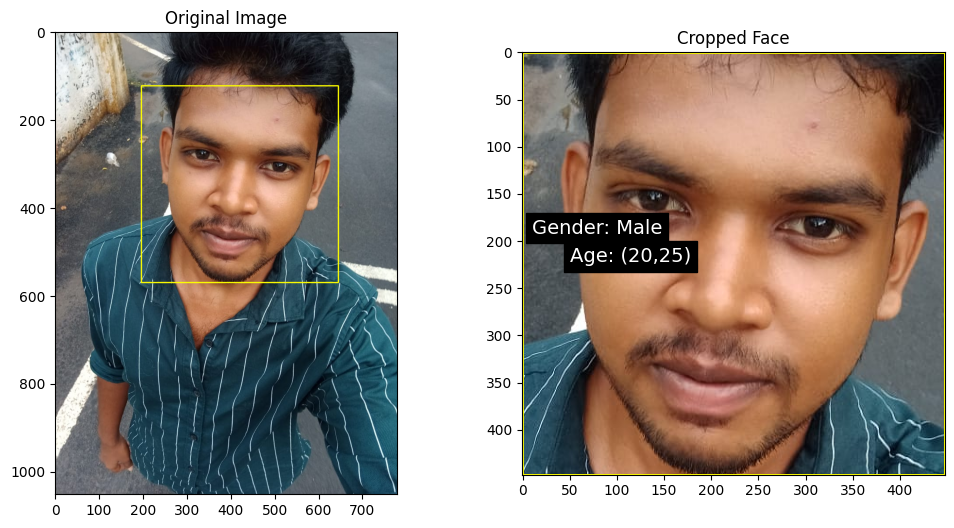

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from tkinter import Tk, filedialog, Label, Button
from PIL import Image, ImageTk

# Load age and gender models
age_model = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
gender_model = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')

mean_value = (78.42633377603, 87.7689143744, 114.895847746)
age_value = ['(0,2)', '(4,6)', '(8,12)', '(15,20)', '(20,25)', '(38,43)', '(48,53)', '(60,100)']
gender_value = ['Male', 'Female']

def upload_image():
    file_path = filedialog.askopenfilename()
    image = imread(file_path, as_gray=False)
    detect_and_display(image)

def detect_and_display(image):
    minimize = (image.shape[1], image.shape[0])
    miniframe = cv2.resize(image, minimize)
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
    faces = cascade.detectMultiScale(miniframe)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
        new_img = image[y:y+h, x:x+w].copy()
        img_blob = cv2.dnn.blobFromImage(new_img, 1.0, (227, 227), (127.5, 127.5, 127.5), swapRB=True)

        gender_model.setInput(img_blob)
        gender_predicted = gender_model.forward()
        gender = gender_value[gender_predicted[0].argmax()]

        age_model.setInput(img_blob)
        age_predicted = age_model.forward()
        age = age_value[age_predicted[0].argmax()]

        plt.figure(figsize=(12, 6))
        plt.subplot(121), plt.imshow(image), plt.title('Original Image')
        plt.subplot(122), plt.imshow(new_img), plt.title('Cropped Face')
        plt.text(10, y+70, 'Gender: ' + gender, fontsize=14, color='white', backgroundcolor='black')
        plt.text(50, y+100, 'Age: ' + age, fontsize=14, color='white', backgroundcolor='black')
        plt.show()

# Create a basic Tkinter GUI
root = Tk()
root.title("Age and Gender Prediction")
root.geometry("400x200")

label = Label(root, text="Upload an image to predict age and gender")
label.pack(pady=10)

root.configure(bg='#9370DB')

upload_button = Button(root, text="Upload Image", command=upload_image,bg='#FFD700', fg='black',font=("Helvetica", 14))
upload_button.pack(pady=10)

root.mainloop()